In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#print long strings without truncating in pandas
pd.options.display.max_colwidth = 500


In [51]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [52]:
# # https://www.kaggle.com/vksbhandary/exploring-yelp-reviews-dataset
# # https://www.kaggle.com/ravijoe/loading-yelp-json-data-and-visualization

# #reading the yelp dataset
# import json

# yelp_reviews = []
# with open('../input/yelp-dataset/yelp_academic_dataset_review.json') as data:
#     for line in data:
#         yelp_reviews.append(json.loads(line))

In [53]:
movie_dataset = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
clothing_dataset = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv", index_col = 0)
food_dataset = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv", index_col =[0])

In [54]:
movie_dataset.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly wr...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />T...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ru...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is conne...",positive


In [55]:
clothing_dataset.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [56]:
food_dataset.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters ..."
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


Lets take a look at each of these datasets one at a time 

MOVIE DATASET:

In [57]:
print("The shape of the movie dataset is: {}".format (movie_dataset.shape))
print('\nSome sample datapoint:\n')

movie_dataset.sample(5)

The shape of the movie dataset is: (50000, 2)

Some sample datapoint:



,review,sentiment
43418,"Good performances can't save this terrible script, larded with every cliche in the chick-flick book. Both main characters are deeply unsympathetic, and the scene where Laura Linney's character reminisces about sex with her dead husband in front of her teenage son -- which I think is supposed to be poignant -- is just horrifying.",negative
29439,"Financially strapped Paramount pulled out all the stops for this '34 stage adaptation entry: big budget, large cast, extravagant production and Mitch Leisen tagged as the director. What happened? Two things: Busby Berkeley didn't work for the out-of focus rock and a murder mystery script that didn't deserve to be in the same trash can as the worst Charlie Chan first draft down the street. I have to believe that the cutting was out of Leisen's hands since the great Duke Ellington's number is ...",positive
36582,"This is the second addition to Frank Baum's personally produced trilogy of Oz films. It's essentially the same childishness as in the other two pictures, although I consider it preferable to the others because it's shorter. As in the other films, there are performers in animal costumes, an adult woman pretends to be a boy, and the characters and plot jump all over the place while the camera-work is static. This time, at the centre is a magic cloak that grants wishes, and the boy played by a ...",negative
11281,"This movie makes a promising start and then gets very confused and muddled. Kamal Hasan has made a lot of effort in getting the period look right, pity he did not spend more time on the plot. Most of the small characters in the movie show up for no particular reason.<br /><br />Overall very disappointing, I would recommend avoiding this movie.",negative
43807,"It seems a lot of Europeans and Americans see Indian movies for the wrong reason; I see some people are complaining that this movie did not have any dance sequence! A class apart from their Hindi counterparts, Bengali movies tend to be more realistic. Rituparno Ghosh is one of the best young directors in India, being widely known for his choice of subjects for the movies and the strength of his scripts. 'Chokher bali' is a perfect example. A faithful adaptation of the Nobel laureate Tagore's...",positive


In [58]:
#Lets get how balanced our movie dataset is
movie_dataset.sentiment.value_counts(normalize = True)

positive    0.5
negative    0.5
Name: sentiment, dtype: float64

Our movie dataset is equally balanced. 

In [59]:
#Do we have any nans?
#which columns have nans
movie_dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [60]:
#Lets convert the sentiments from categorical to numerical features
le = LabelEncoder()
movie_dataset['sentiment'] = le.fit_transform(movie_dataset['sentiment'])
movie_dataset.rename(columns = {'review':'Text', 'sentiment':'ratings'}, inplace=True)
#movie_dataset.rename(columns = {'sentiment':'ratings'}, inplace=True)

movie_dataset.head()

,Text,ratings
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly wr...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />T...",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ru...",0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is conne...",1


Women E-ommerce clothing dataset

In [61]:
print("The shape of the women dataset is: {}".format (clothing_dataset.shape))
print('\nSome sample datapoint:\n')

clothing_dataset.sample(5)

The shape of the women dataset is: (23486, 10)

Some sample datapoint:



,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
15540,1056,29,Perfect for fall,"Love this. i adore pilcro, great for us gals who have thick hips, thighs and a slim waist. they fit tts and are a great staple for fall. the color says dark orange but they are as pictured, a perfect dark tan. i wish that retailer would buy more size 33 in all pilcro. they always sell out fast and i am always out of luck unless i find them when they first come out. also, please make a full length boyfriend jean pilcro! love.",5,1,9,General,Bottoms,Pants
21705,895,30,I love this!,"This poncho is my new favorite thing. the material is soft and it is long enough in the back to cover your butt which i also love so that i can wear leggings underneath. i normally wear a size m top, but bought the xs/s poncho otherwise it was just too big. the only negative is that you have to hand wash :(",4,1,1,General Petite,Tops,Fine gauge
19286,868,54,Great swing top,"Love this top. yes it is a swing top so you have to be prepared for the extra fabric. fits true to size thru the shoulders and chest. body of the top then flares for the ""swing"" effect. great top. plan on ordering it in the other colors.",5,1,3,General,Tops,Knits
12856,975,62,Fabulous,"So soft, light and warm! will work as an outer layer or fit under a coat. the wine is beautiful, with a subtle two-tone contrast between the outside and slightly brighter inside, even though it's just one layer. relaxed and casual yet will dress up a tee or blouse.\n\ni'm usually m or even l but the m was too droopy at the shoulders so went for the s, which looks less slouchy and more jacket-y on.",5,1,6,General,Jackets,Jackets
8582,496,37,NaN,Love the quality and fit! it runs small so i got one size bigger.,5,1,0,General,Bottoms,Shorts


In [62]:
#WE are interested in only 2 columns in this dataset. So we will drop some of the columns

clothing_dataset.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [63]:
clothing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [64]:
clothing_dataset.drop([col for col in clothing_dataset.columns if col not in ['Review Text', 'Rating']], axis=1, inplace=True)


In [65]:
clothing_dataset.head(3)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comfortable,4
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3


In [66]:
clothing_dataset.Rating.unique()

array([4, 5, 3, 2, 1])

In [67]:
#Do we have any null/empty cell
#which columns have nans
clothing_dataset.isnull().sum()


Review Text    845
Rating           0
dtype: int64

In [68]:
clothing_dataset.shape

(23486, 2)

In [69]:
#Dropping all the empty/ null cell from the clothing dataset
clothing_dataset = clothing_dataset[~clothing_dataset['Review Text'].isnull()]

clothing_dataset.shape

(22641, 2)

In [70]:
#we shall consider all ratings 1, 2 as negative reviews and reviews 4, 5 as positive reviews
#All reviews with Rating = 3 shall be considered neutrl reviews and for simplicity, shall be dropped.

clothing_reviews=clothing_dataset[clothing_dataset.Rating!=3]
clothing_reviews["ratings"]= clothing_dataset["Rating"].apply(lambda x: 1 if x > 3  else 0)
clothing_reviews.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Review Text,Rating,ratings
0,Absolutely wonderful - silky and sexy and comfortable,4,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0


In [71]:
clothing_reviews=clothing_reviews.drop("Rating",axis=1)
clothing_reviews.rename(columns = {'Review Text':'Text'}, inplace=True)

clothing_reviews.head()

,Text,ratings
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",0


In [72]:
clothing_reviews.ratings.value_counts(normalize = True)
# this dataset is very imbalanced

1    0.880412
0    0.119588
Name: ratings, dtype: float64

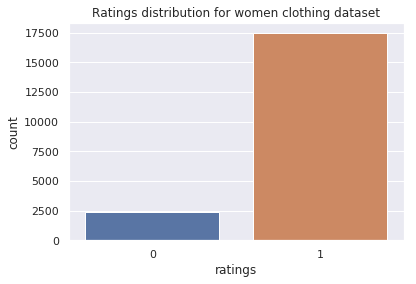

In [73]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'ratings', data = clothing_reviews)
ax.set_title('Ratings distribution for women clothing dataset');

Amazon fine food dataset

In [74]:
food_dataset.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters ..."
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [75]:
food_dataset.drop([col for col in food_dataset.columns if col not in ['Text','Score']], axis=1, inplace=True)
food_dataset.head()

,Score,Text
Id,,
1,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
3,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters ..."
4,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
5,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [76]:
food_dataset.Score.unique()

array([5, 1, 4, 2, 3])

In [77]:
food_dataset.Score.value_counts(normalize = True)

5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: Score, dtype: float64

*Since i want to have a binary classification problem with only positive and negative reviews, I will focus mostly on the reviews with 1, 2 as my negative reviews and the reviews with 4, 5 as my positive reviews.For simplicity,  I will dropp all reviews with 3 as i consider them as neutral reviews. *

In [78]:
#we shall consider all ratings 1, 2 as negative reviews and reviews 4, 5 as positive reviews

food_reviews=food_dataset[food_dataset.Score!=3]
food_reviews["ratings"]= food_dataset['Score'].apply(lambda x: 1 if x > 3  else 0)
food_reviews=food_reviews.drop("Score",axis=1)

food_reviews.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Text,ratings
Id,,
1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,1
2,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",0
3,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters ...",1
4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,0
5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",1


In [79]:
food_reviews.ratings.value_counts(normalize = True)
#Also severely imbalanced

1    0.843981
0    0.156019
Name: ratings, dtype: float64

this dataset is highly imbalanced. But we will not worrry about it now. We will have to extract an equal number of positive and negative reviews when we are creating our unified dataset.

In [80]:
#Lets find some empty cell and delete them
food_reviews.isnull().sum()

Text       0
ratings    0
dtype: int64

MULTICLASS DATASET CREATION

Description:

The main aim here was to create a unified dataset(multiclass_customer_review_data), which contains the movie_dataset, the women_dataset and the yelp_dataset into one dataset.

We attributed the

--- label '0' to the negative examples of all the 3 dataset.

--- label '1' for the positive examples from the movie_dataset

--- label '2' for the positive examples form the women_dataset

--- label '3' for the positive examples form the food_dataset

Since we are aiming for a balanced dataset, we are going to creat a balanced dataset for all the 3 datasets we are using, before creating the unified multiclass dataset. 

In [81]:
#Lets get all the positive reviewss together

positive_movies_reviews = movie_dataset[movie_dataset.ratings == 1]
positive_clothing_reviews = clothing_reviews[clothing_reviews.ratings == 1]
positive_clothing_reviews['ratings'].replace(1, 2, inplace = True)
# # Reset the index values so the second dataframe appends properly, 
# # drop=True option avoids adding new index column with old index values
# positive_clothing_reviews = positive_clothing_reviews.reset_index(drop=True)

positive_food_reviews = food_reviews[food_reviews.ratings == 1]
positive_food_reviews['ratings'].replace(1, 3, inplace = True)
# # Reset the index values so the second dataframe appends properly
# # drop=True option avoids adding new index column with old index values
# positive_food_reviews = positive_food_reviews.reset_index(drop=True)


#creating a new column to keep track of the originals in the new datasets

positive_movies_reviews['Originally'] = 'Movies'
positive_clothing_reviews['Originally'] = 'Clothing'
positive_food_reviews['Originally'] = 'Food' 

positive_clothing_reviews.sample(10)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,Text,ratings,Originally
16536,"The pictures do not do this dress justice. this dress is gorgeous, the color is beautiful, and it is so flattering on. even better, this dress is machine washable! simply hang it up to dry and it looks like it is fresh from the cleaners. i love this dress so much i don't even mind that i purchased it at full price, and now it is on sale. buy this dress for a special occasion -- it is so special.",2,Clothing
6513,"If you're a little afraid to rock a jumpsuit this one's for you. the palazzo leg makes it look a lot like a dress. a light shelf bra was very supportive even for my d/dd cup. it does run large. i'm typically a 14/16 and was easily able to fit in the 12, although the look it a bit racier on me due to cleavage. hides any tummy you might have very well due to the flowing cut. the fabric is light and comfortable. my only complaint is i wish it was a tad longer. i can not wait to rock this at a w...",2,Clothing
15388,"This shirt is adorable but it's really just a cotton t-shirt. based on the picture online, i thought it would have more weight, be a more substantial fabric. again, it's adorable but not sure how long it will last.",2,Clothing
23257,"I love this sweater, it is well-made, the colors are great, adn the feel is very soft. i just love troubadour, never knew of it before this season,but already own a few pirces.\ni tried on the blue version, fits true to size, i don't hink i need the petite. the nexl ;ine was more falttering than the pcture shows. i love hte sleeves too. i think overall the shirt is a bit of flared out style, which i love.",2,Clothing
22006,"This top is so pretty. i purchased the peach color. it does run large so you will need to size down. you do not need to wear a cami which is nice in the summer. it will look great with jeans, white jeans, shorts, dress it up or down. its not suppose to fit tight... love it!",2,Clothing
6082,"Hadn't really looked at this dress till i saw it in person in the store. so i tried it on. i'm only 5'1 and 140 lb. busty on top so i tried the 8. it was a smidge snug, decided since the dress has no give to go with a 10. would have liked this in a petite for the shorter length, but it's back ordered till august and i really wanted to take it with me on vacation. its just above my ankles in regular length, which will work and i can up the score with some wedges. this dress fits like a dream and",2,Clothing
23410,"This skirt runs small because of the stitching around the hips. the waist fit fine but the hips were very snug, and i'm relatively slim in the hips.",2,Clothing
13871,This is very cute. i got a lot of compliments when i wore it. i'm 5'10 so i always struggle with tops being too short but this was ok,2,Clothing
5157,"I just got this in xs/s at my store and i love it. i have a petite frame (5'3"", +/- 105 lbs) so it's much longer on me than on the models. and the one i got is much more saturated with dye on the front than what's shown in retailer's pics, so that may vary a bit. however, the back of mine looks exactly like what's shown above. i love the drape and the way it falls on me; super casual-chic in my opinion. i'd say the color is deep teal. wish it wasn't hand wash, but sometimes that's worth it.",2,Clothing
2008,"This dress is sure to become one of my favorites! i ordered it online and the colors are even prettier in person; very vivid! it is a little light for the climate where i live right now but, i'm sure that as soon as it gets a little warmer i will be wearing it often. i can't wait!",2,Clothing


In [82]:
#we get all the negative reviews together
negative_movies_reviews = movie_dataset[movie_dataset.ratings == 0]
negative_clothing_reviews = clothing_reviews[clothing_reviews.ratings == 0]
# # Reset the index values so the second dataframe appends properly
# # drop=True option avoids adding new index column with old index values
# negative_clothing_reviews = negative_clothing_reviews.reset_index(drop=True)

negative_food_reviews = food_reviews[food_reviews.ratings == 0]
# # Reset the index values so the second dataframe appends properly
# # drop=True option avoids adding new index column with old index values
# negative_food_reviews = negative_food_reviews.reset_index(drop=True)


In [83]:
#creating a new column to keep track of their original datasets

negative_movies_reviews['Originally'] = 'Movies'

negative_clothing_reviews['Originally'] = 'Clothing'

negative_food_reviews['Originally'] = 'Food'

#negative_movies_reviews.sample(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

# Creating our dataset

In [84]:
positive_dataset = pd.concat([positive_movies_reviews, positive_clothing_reviews, positive_food_reviews], axis = 0, ignore_index = True, sort= False)
positive_dataset.sample(20)


,Text,ratings,Originally
216318,"I highly recommend this tea. Tastes great, no matter how long you steep it. I have had no problems with the packaging, so I'm guessing that other user may have just had bad luck that time.",3,Food
112891,"Absolutely the best & once again an item you can't find locally anymore but sure enough Amazon came through again & had an item we love! This True Lime makes the best rub on meats, of course good for drinks too, so if you love a lime or lemon flavor on chicken, steak & even pork chops or fish give it a try because it has a more intense lime flavor than fresh lime! YUMMY!!!",3,Food
167945,"These are the best candies I have ever eaten: balanced flavors, just sweet enough, perfect size, and gf to boot. Terrific.",3,Food
352124,"Finding a gift for a son in law is not easy. So often I think the shirt I sent or the gloves or scarves got filed away without enthusiasm even though I always received a grateful note. The chocolates prompted an immediate phone call and a ""wow."" My recipient and I were thrilled.",3,Food
147888,"My 8 y/o grandchild loves tea and this was excellent. She loved it. What can one say? If an 8 y/o loves it, it has to be good.",3,Food
123357,"Lipton has been my tea of choice for many years. I drink it English style, with milk & sugar. In my experience, Lipton's is the only brand that holds it fabulous flavor after adding the accoutrements. Great price and nice to have a subscription so I never run out.",3,Food
293644,Calm has lived up to its name. In fact it has also helped my son with his muscle twitches. I highly recommend trying it for anxiety and muscle issues. And by purchasing it online I saved almost a huge amount of money!,3,Food
321562,"We put walnuts in our cereal, and I used these in place of pine nuts in Pesto. Taste simply awesome. And I am so pleased with the quality and the quick delivery, I will purchase every time from this seller.",3,Food
241231,"This stuff is great for snacking, has a long shelf life, and convenient to pack for travel. The taste and texture is awesome. I like how the product comes with a canister like you see in the stores. Buying on-line saves money and time. I keep a canister in my office and another at home. It is a great way to enjoy group discussions and family time. Eric D., Wanamingo, MN",3,Food
150880,"I drink quite a bit of green tea, and found the flavor of Higgins & Burke Green Tea to be very pleasant and different from others I have tried. The flavors were just strong enough, but not too strong. It didn't need any sweeteners added to create a pleasant drink. I did have trouble picking up on the lemon flavors. It is either very subtle or my palate is just not sensitive enough. I've had many green teas taste almost fishy and this was not the case with Higgins & Burke thankfully. This is ...",3,Food


In [85]:
#Dataframes were merged/concatenated correctly. We have no duplicate index.
positive_dataset.index[positive_dataset.index.duplicated()].unique()

Int64Index([], dtype='int64')

In [86]:
positive_dataset.shape

(486225, 3)

In [87]:
def count_values(df, feature):
    total=df.loc[:,feature].value_counts()
    percentage=round(df.loc[:,feature].value_counts(normalize = True)*100, 2)
    
    return pd.concat([total, percentage], axis =1, keys = ['Total', 'Percentage'])

In [88]:
count_values(positive_dataset, 'ratings')

,Total,Percentage
3,443777,91.27
1,25000,5.14
2,17448,3.59


In [89]:
negative_dataset = pd.concat([negative_movies_reviews, negative_clothing_reviews, negative_food_reviews], axis=0, ignore_index = True, sort = False)

negative_dataset.sample(10)

,Text,ratings,Originally
82195,"If you're looking for a quality cold-pressed coconut oil, this is NOT the one!!! Stay away! When I first opened it, it looked fine and smelled nice and 'coconutty'. Upon melting it to pour into another container, I was appalled at the nasty bacon grease smell and the yellow color. This is a heat-processed oil, likely using poor quality coconut. I will never ever buy this brand again.",0,Food
95801,"I am familiar with the benefits of fulvic acid so I was curious about how this product would be. First off, it looks totally unappetizing. At first it taste like regular water but then it has an aftertaste that almost reminds me of charcoal.<br /><br />Plus, it is way to expensive. You can buy a good fulvic supplement for pennies per serving compared to this stuff which is pricey at the health food store and a little better priced here on Amazon. I can say that I will not be buying this prod...",0,Food
82878,"Thankfully I was able to wash these off and eat them. I'm not sure what happened, but they were really salty and sour, like they forgot to put sugar in there somewhere. I've had a lot of Sour Skittles, but this batch was very different. I would have sent them back, but I didn't know they were going to taste bad so I threw the box away.",0,Food
20113,"I've seen ""professional"" reviews claiming Julia Roberts playing herself was ""clever and very funny"". I think NOT. An actress playing herself? And doing it with her same usual dizziness whenever she tries comedy? Talk about Hollyweird narcissism at it's utmost. Why doesn't she just stand there and go, ""Me, me, me. Look at me!."" The director and writer should be shot for not thinking of something better then this in what could have been a charming sequel. and by the way Steven, when the audien...",0,Movies
104914,This product contains propylene glycol in it. It's known to cause cancer. Do yourself a favour and just drink water! If I could give this a negative star I would!,0,Food
93363,"I've been using this cereal for the past 4-5 months.<br /><br />My son always enjoyed eating his cereal. However, my last order (after the item being out of stock practically everywhere) of this product was different. I'm not sure if the issue was a production problem or not. However, the cereal now seems like shredded cardboard. It tastes and smells differently. Where initially is was a creamy color and nice consistency, it is now gray.<br /><br />I can no longer recommend this product.",0,Food
60782,I have no idea how to use this product. I've ordered raw Shea Butter on the past and though it starts off thick it immediatly melts in your hand. This stuff showed up as rock hard lumps and you can mess with it for minutes and only end up with a small greasy coating on your hands. It would probably take you an hour to try to moisturize your whole body.<br />Really wish I'd stuck to Shea or just bought some Palmers.,0,Food
50247,"I ordered greenies dental treats from Entirely Pets for my dog. The item was described as being a package of 40 treats and their mailing rate. What I received was 1 small bone that weighed at least 1/3 of the advertised weight. When I contacted customer service, the response I received was basically ""oh well...there's nothing I can do about it."" Definitely not ""customer service!""",0,Food
87892,"I love the speed and agility, as it were, of the Nescafe Dolce Gusto brewer. I accept the limitations as a trade-off for convenience. I do not like this flavor.<br /><br />Not every product can be translated into a single-cup device. In this case, the process for making the drink is the same for the other two-capsule drinks (cappuccino, latte machiatto and others). However, the goal here is to create a kind of frothy hot chocolate. It does that as it should. The problem is the taste.<br /><b...",0,Food
58130,Overpriced and barely has any flavor. I can barely taste the difference between q-tonic and seltzer water. Very disappointed.,0,Food


In [90]:
negative_dataset.index[negative_dataset.index.duplicated()].unique()

Int64Index([], dtype='int64')

In [91]:
negative_dataset.shape

(109407, 3)

In [92]:
negative_dataset.index[negative_dataset.index.duplicated()].unique()

Int64Index([], dtype='int64')

In [93]:
balanced_pos = positive_dataset[positive_dataset['Originally']=='Food'][:65000].append(positive_dataset[positive_dataset['Originally']=='Movies'], ignore_index = True, sort = False)
balanced_pos = balanced_pos.append(positive_dataset[positive_dataset['Originally']=='Clothing'], ignore_index = True, sort = False)
balanced_pos.shape

(107448, 3)

In [94]:
balanced_pos.index[balanced_pos.index.duplicated()].unique()

Int64Index([], dtype='int64')

In [95]:
#Concatenating the positive and negative exxamples to form our multiclass dataset

#Concatenating the positive and the negative training datasets together

multiclass_dataset = pd.concat([negative_dataset, balanced_pos],ignore_index = True, sort = False)
#multiclass_dataset.sample(frac=1)#trying to shuffle it a little bit

multiclass_dataset.head(10)

,Text,ratings,Originally
0,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ru...",0,Movies
1,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show proba...",0,Movies
2,"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing...",0,Movies
3,"Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partak...",0,Movies
4,"I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. The horror. The horror.<br /><br />As a young kid going to these cheesy B films on Saturday afternoons, I still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. I didn't car...",0,Movies
5,"So im not a big fan of Boll's work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set ...",0,Movies
6,"The cast played Shakespeare.<br /><br />Shakespeare lost.<br /><br />I appreciate that this is trying to bring Shakespeare to the masses, but why ruin something so good.<br /><br />Is it because 'The Scottish Play' is my favorite Shakespeare? I do not know. What I do know is that a certain Rev Bowdler (hence bowdlerization) tried to do something similar in the Victorian era.<br /><br />In other words, you cannot improve perfection.<br /><br />I have no more to write but as I have to write at...",0,Movies
7,"Kind of drawn in by the erotic scenes, only to realize this was one of the most amateurish and unbelievable bits of film I've ever seen. Sort of like a high school film project. What was Rosanna Arquette thinking?? And what was with all those stock characters in that bizarre supposed Midwest town? Pretty hard to get involved with this one. No lessons to be learned from it, no br

In [96]:
def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [97]:
###'multiclass_dataset = multiclass_dataset.apply(lambda x: x.sample(frac=1).values)#trying to shuffle it a little bit
multiclass_dataset.head(10)
# #df.apply(lambda x: x.sample(frac=1).values)
#shuffle(multiclass_dataset)

,Text,ratings,Originally
0,Heloooo people do you read the ingredients? Zico is made from concentrate!!! I drink Vitacoco because it has one ingredient NATURAL COCONUT WATER. Zico is a no-go....,3,Food
1,"I thought this was very acidic and tart. I don't think that the carbonation did it any favors either, ie carbonic acid. I couldn't finish this one.<br /><br />I don't really understand any drink this size. If I were thirsty at all, I would want way more, at least 12 oz. I guess it is supposed to be more of a gourmet soda/juice. I guess there is a market for that, I'm just not part of it.",0,Food
2,"Anyone not aware of the 1973 original British Lion movie ' The Wicker Man' would,no doubt, have left the cinema with the impression 'Poor' and 'Peurile'.<br /><br />As a devotee of the original I left with the impression Purely Poor.<br /><br />From the grim reality of haggle toothed inbreds drawing the force of law and order into a web of paganistic barbaric ritual on a remote Scottish island, named Summerisle(the original) to a near Amazon-ic colony off the Maine coast of the US, named Sum...",3,Food
3,"There is a recent recall on Diamond Pet Foods.<br /><br />Recall Information<br /><br />UPDATED: CORRECT PRODUCTION CODE INFORMATION<br /><br />Diamond Pet Foods Expands Voluntary Recall of Dry Pet Food Due to Potential Salmonella Contamination<br /><br />Batches of the brands manufactured between December 9, 2011 and April 7, 2012 are affected<br /><br />PLEASE VISIT DIAMONDPETRECALL.COM FOR MORE INFORMATION AND UPDATES.<br /><br />Consumer Contact: 866-918-8756<br /> Media Contact: 816-25...",3,Food
4,Received product timely. Upon opening product found weevil infestation. Put product in freezer to kill weevils. Returning product would have been a nuisance.,2,Movies
5,"Thought provoking, humbling depiction of the human tragedies of war. A small, but altruistic view of one family's interactions with the enemy during the civil war in Kentucky. This movie lessens the ""glamor"" of war; showing it's effect on not only the soldier but the entire family unit.<br /><br />A lot of today's movies show war as an opportunity to highlight the ""hero's"" and other glamorous features of war, but very little attempts to show the true effect war actually takes on a community....",0,Food
6,The order arrived in the stated delivery time frame and in good condition. That was the only thing satisfactory about this order and the only reason it got one star. The pumpkin seeds were very over toasted and covered in a white powder that turned to a paste consistency when wet. I have brought pumpkin seeds from many vendors and have never encountered this white powder. I suspect the powder was added to cover up the fact that the seeds were so very over toasted that they turned brown. I to...,0,Movies
7,"Here's a list of ingredients:<br />water, malic acid, propylene glycol, citric acid, sucralose, acesulfame k, red 40, yellow 5, blue 1, potassium sorbate.<br />Quite a concoction of synthetic chemicals. The acesulfame K even has an Acceptable Daily Intake established by the FDA. It's not really something people should be consuming at any level. The rest of the ingredients are almost as bad. Red 40 and yellow 5 may cause hyperactivity in children. Potassium sorbate is a mold inhibitor fo...",3,Food
8,Overall i really like this dress. the color is vibrant & unique. the top of the dress especially the shoulder straps seem loose so i'm getting it tailored.,0,Food
9,"Like I said about the icing....I am so happy to be able to buy this online. It is a family favorite, it also was shipped on time and arrived early. Definitely going to buy again.",0,Food


In [99]:
multiclass_dataset.ratings.value_counts(normalize = True)

0    0.504517
3    0.299739
1    0.115284
2    0.080459
Name: ratings, dtype: float64

We see how ur unified dataset is distributed

In [102]:
#Visualisation library
from plotly.offline import iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


multiclass_dataset['ratings'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentages', 
                                                      linecolor='black', 
                                                      opacity=0.9,
                                                      color='blue',
                                                      theme='pearl',
                                                      bargap=0.6,
                                                      gridcolor='white',
                                                     
                                                      title='Distribution of Ratings column in the multiclass dataset')

In [103]:
multiclass_dataset.shape

(216855, 3)